# Computational Exercise 1: A Vary Great, Very Harmonic, Wavefunction
We will apply the Variational Method to the Harmonic Oscillator.  In particular, we will optimize
the trial wavefunction given by 
\begin{equation}
\Phi(x) = {\rm exp}\left( -\alpha x^2 \right),
\end{equation}
where $\alpha$ is an adjustable parameter that will be variationally optimized.  In particular, the goal
will be to minimize the energy functional given by
\begin{equation}
E[\Phi(x)] = \frac{\int_{-\infty}^{\infty} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_{-\infty}^{\infty} \Phi^* (x) \: \Phi(x) dx }
\end{equation}
by modulating the trial wavefunction through the adjustable parameter $\alpha$.

The Hamiltonian operator for Harmonic Oscillator is given by 
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} k \: x^2.
\end{equation}
We will use a system of natural units where $\hbar = 1$, the mass of the particle $m = 1$, and the force constant of
the potential $k = 1$.

### Questions Answered
1. What is the optimal value of $E[\Phi(x)]$ in natural units?  How does this value compare to the true ground state energy of the Harmonic Oscillator?

*Answer*  The optimal value of $E[\Phi(x)]$ to 4 significan figures is $0.4996$ a.u.; this agrees with the 
true ground state energy of $0.5$ atomic units.

2. What is the optimal value of $\alpha$ in natural units?  How does $\Phi(x)$ with this value of $\alpha$ compare to the true ground state wavefunction?

*Answer* The optimal value of $\alpha$ to 4 significant figures is $0.4987$ atomic units, which agrees with
the true ground state wavefunction, which has $\alpha = 0.5$ atomic units.

3. What is the kinetic energy expectation value of the optimized trial wavefunction in natural units?

*Answer* The kinetic energy expectation value when $\alpha \approx 0.5$ is $\approx 0.25$ atomic units.

4. What is the potential energy expectation value of the optimized trial wavefunction in natural units?

*Answer* The potential energy expectation value when $\alpha \approx 0.5$ is $\approx 0.25$ atomic units.


### (Hopefully) Helpful Hints
You can represent your trial wavefunction numerically on the computer by creating an array of x-values, evaluating
the formula for your trial wavefunction at each of those x-values, and then storing each of those function values in another array.  The following lines of code will do this using $numpy$ arrays and the $numpy.exp$ function. 

### Solutions
First let's initialize the trial wavefunction with a particular value of $\alpha$; might as well pick $\alpha = 1$!
The following code-block will create this trial wavefunction and plot it against the potential.

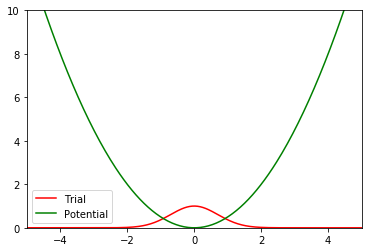

In [4]:
import numpy as np
from matplotlib import pyplot as plt
### create an array of 1000 x-values between x=-20 and x=20 atomic units
x_array = np.linspace(-20,20,1000)
### pick a trial value of alpha... might as well be 1 atomic unit!
alpha = 1.0
### evaluate your trial wavefunction at each of the x-values stored in the array called 'x_array'
Phi = np.exp(-alpha * x_array**2)
Vx = 1/2. * x_array **2

plt.plot(x_array, Phi, 'red', label='Trial')
plt.plot(x_array, Vx, 'green', label='Potential')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.legend()
plt.show()



Next we need to be able to evaluate the expectation values of energy with a given trial wavefunction; to do so we will have to evaluate expectation values with the kinetic and potential energy operators.
To evaluate the kinetic energy of a trial wavefunction, we will need to take the second derivative of the trial wavefunction.
One way to take derivatives on a computer is to use the method of finite differences.  In particular, the forward finite difference
approximation to the first derivative of your trial wavefunction $\Phi(x)$ at the point $x_0$ can be written symbolically as
\begin{equation}
\frac{d \Phi(x_0)}{dx} = \frac{\Phi(x_0 + dx) - \Phi(x_0)}{dx}
\end{equation}
where in our code, $dx$ will be determined by the range of x-values and the number of x-values used in defining
$x_{array}$.

The following block contains a function that takes the first derivivative using forward finite differences,
a function that uses this differentiation function to apply the kinetic energy operator to a trial
wavefunction, a function that applies the potential energy operator to a trial wavefunction, and functions
that compute the expectation values for kinetic, potential, and total energy.


In [5]:
### differentiation function
def dfdx(fx, x):
    ### loop through values of fx and x and use forward finite-differences 
    ### to compute the d/dx of fx at each point and store in an array called 'fxp'
    ### make sure to poperly handle
    ### the last point where f(x_0 + dx) is not stored
    ### create a numpy array called fxp that has the same length
    ### and data type as the array of function values you are differentiating
    fxp = np.zeros_like(fx)
    
    for i in range(0,len(x)-1):
        rise = fx[i+1]-fx[i]
        run = x[i+1]-x[i]
        slope = rise/run
        fxp[i] = slope

    ### once you have computed all fxp values, return the array!
    return fxp

### compute kinetic energy operator on a trial wavefunction fx
def TPhi(fx,x):
    # This take the first derivative of fx and stores it as fxp
    fxp= dfdx(fx,x)
    # this takes the first derivative of fxp and stores it as fxpp
    fxpp=dfdx(fxp,x)
    # now return second derivative of fx multiplies by -1/2
    return -1/2*fxpp

### compute potential energy operator on trial wavefunction fx
def VPhi(fx,x):
    return 1/2*x**2*fx

### compute total energy operator on trial wavefunction
def HPhi(fx,x):
    return TPhi(fx,x) + VPhi(fx,x)

### Function will take our trial wavefunction and our grid of 
### x values and return the energy expectation value
### using rectangular rule for the integrals!
def E_of_Phi(fx,x):
    ###get my dx value!
    dx= x[1]-x[0]
    ### get my numerator function!
    hp = HPhi(fx,x)
    phi_star = np.conj(fx)
    num_func = phi_star*hp
    ### get my denominator function 
    den_func = phi_star*fx
    
    ### define numerator sum variable
    num_sum= 0.
    ### define denominator sum variable 
    den_sum= 0.
    ### perform the loop to comupte the rectangle-rule approzimation to th integrals!
    for i in range(1,len(x)):
        ### add the area of the numerator rectangle to num_sum 
        num_sum = num_sum + num_func[i] * dx
        ### add the area of the denominator rectangle to den_sum 
        den_sum = den_sum + den_func[i] * dx
    
    return num_sum/den_sum

### Function will take our trial wavefunction and our grid of 
### x values and return the kinetic energy expectation value
### using rectangular rule for the integrals!
def T_of_Phi(fx,x):
    ###get my dx value!
    dx= x[1]-x[0]
    ### get my numerator function!
    tp = TPhi(fx,x)
    phi_star = np.conj(fx)
    num_func = phi_star*tp
    ### get my denominator function 
    den_func = phi_star*fx
    
    ### define numerator sum variable
    num_sum= 0.
    ### define denominator sum variable 
    den_sum= 0.
    ### perform the loop to comupte the rectangle-rule approzimation to th integrals!
    for i in range(1,len(x)):
        ### add the area of the numerator rectangle to num_sum 
        num_sum = num_sum + num_func[i] * dx
        ### add the area of the denominator rectangle to den_sum 
        den_sum = den_sum + den_func[i] * dx
    
    return num_sum/den_sum

### Function will take our trial wavefunction and our grid of 
### x values and return the potential energy expectation value
### using rectangular rule for the integrals!
def V_of_Phi(fx,x):
    ###get my dx value!
    dx= x[1]-x[0]
    ### get my numerator function!
    vp = VPhi(fx,x)
    phi_star = np.conj(fx)
    num_func = phi_star*vp
    ### get my denominator function 
    den_func = phi_star*fx
    
    ### define numerator sum variable
    num_sum= 0.
    ### define denominator sum variable 
    den_sum= 0.
    ### perform the loop to comupte the rectangle-rule approzimation to th integrals!
    for i in range(1,len(x)):
        ### add the area of the numerator rectangle to num_sum 
        num_sum = num_sum + num_func[i] * dx
        ### add the area of the denominator rectangle to den_sum 
        den_sum = den_sum + den_func[i] * dx
    
    return num_sum/den_sum

Quick detour to validate our forward finite difference function.  Here we will compute the 
$\frac{d \Phi(x)}{dx}$ using our $dfdx$ function and analytically (or by Wolfram Alpha) and plot the two results to verify that they agree.

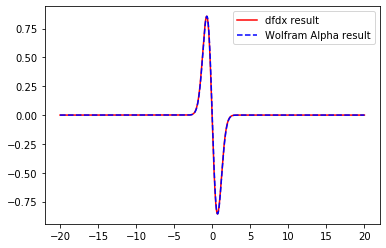

In [6]:
### Call dfdx on Phi to get the first derivative of Phi
Phi_p = dfdx(Phi, x_array)

Phi_wa = -2 * alpha * x_array * Phi

plt.plot(x_array, Phi_p, 'red', label='dfdx result')
plt.plot(x_array, Phi_wa, 'b--', label='Wolfram Alpha result')
plt.legend()
plt.show()


### Call dfdx on Phi_p to get the second derivative of Phi
Phi_pp = dfdx(Phi_p, x_array)

Now let's scan through a reasonable range of $\alpha$ values, perhaps between 0.05 and 1.0, and compute the kinetic, potential, and total energy expectation value for each to try to determine the variationally optimal value of $\alpha$.

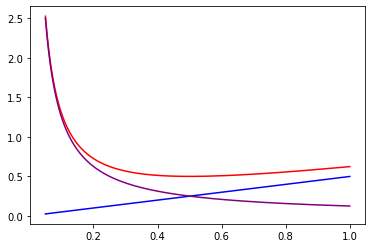

 Minimum energy occurs at a value of alpha of 0.4987437185929648
 Minimum energy is  0.49965284712086927
 Kinetic Energy when alpha is  0.4987437185929648 is  0.24902312419895434
 Potential Energy when alpha is  0.4987437185929648 is  0.2506297229219144


In [14]:
alpha_array = np.linspace(0.05, 1.0, 200)
v_vs_alpha = np.zeros_like(alpha_array)
t_vs_alpha = np.zeros_like(alpha_array)
e_vs_alpha = np.zeros_like(alpha_array)

idx = 0 
for a in alpha_array:
    Phi = np.exp(-a * x_array**2)
    e_vs_alpha[idx] = E_of_Phi(Phi,x_array)
    t_vs_alpha[idx] = T_of_Phi(Phi,x_array)
    v_vs_alpha[idx] = V_of_Phi(Phi,x_array)
    idx+=1
    
plt.plot(alpha_array, e_vs_alpha, 'red')
plt.plot(alpha_array, t_vs_alpha, 'blue')
plt.plot(alpha_array, v_vs_alpha, 'purple')
plt.show()

### get the index of the minimum value of e_vs_alpha
min_idx = np.argmin(e_vs_alpha)

print(" Minimum energy occurs at a value of alpha of", alpha_array[min_idx])
print(" Minimum energy is ",e_vs_alpha[min_idx])
print(" Kinetic Energy when alpha is ",alpha_array[min_idx], "is ", t_vs_alpha[min_idx])
print(" Potential Energy when alpha is ",alpha_array[min_idx], "is ", v_vs_alpha[min_idx])
    